![](../images/FE_00.png)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Womens_Clothing_E_Commerce_Reviews').getOrCreate()

In [4]:
train = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_resampling.parquet")

In [5]:
train = train.withColumnRenamed('Rating', 'label')

In [6]:
test = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_test.parquet")

In [7]:
test = test.withColumnRenamed('Rating', 'label')

## 9.3. Decision Tree 
### 9.3.1. Build model

In [8]:
from pyspark.ml.classification import DecisionTreeClassifier

In [9]:
detree = DecisionTreeClassifier()

In [10]:
detree_model_0 = detree.fit(train)

### 9.3.2. Đánh giá model
#### 9.3.2.1. Trên test

In [11]:
test_res_0 = detree_model_0.transform(test)

In [12]:
test_res_0.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(14162,[0,1,2,3,4...|    5|[0.0,48.0,110.0,1...|[0.0,0.0045231813...|       4.0|
|(14162,[0,1,2,3,4...|    5|[0.0,48.0,110.0,1...|[0.0,0.0045231813...|       4.0|
|(14162,[0,1,2,3,5...|    5|[0.0,18.0,20.0,26...|[0.0,0.0039267015...|       5.0|
|(14162,[0,1,2,3,5...|    5|[0.0,0.0,4.0,56.0...|[0.0,0.0,0.012618...|       4.0|
|(14162,[0,1,2,3,5...|    4|[0.0,6.0,4.0,76.0...|[0.0,0.0021978021...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,18.0,20.0,26...|[0.0,0.0039267015...|       5.0|
|(14162,[0,1,2,3,5...|    3|[0.0,18.0,20.0,26...|[0.0,0.0039267015...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,18.0,20.0,26...|[0.0,0.0039267015...|       5.0|
|(14162,[0,1,2,3,5...|    4|[0.0,0.0,4.0,56.0...|[0.0,0.0,0.012618...|       4.0|
|(14162,[0,1,2,3

#### 9.3.2.2. Confusion matrix

In [13]:
cm = test_res_0.groupBy('label', 'prediction').count()

In [14]:
from modules.utils import confusionMatrix

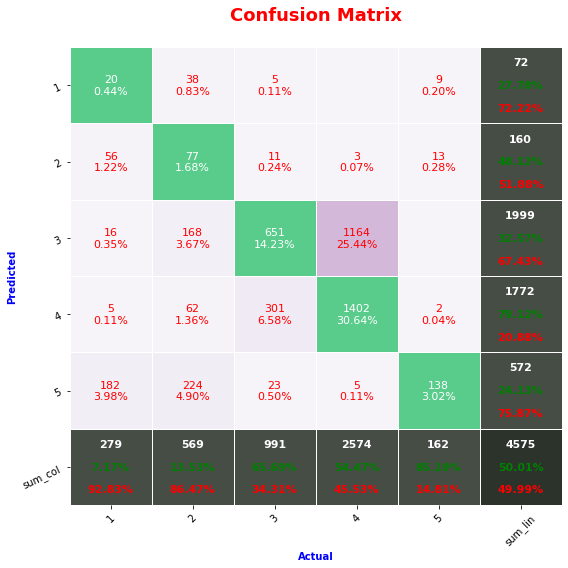

In [15]:
confusionMatrix(cm)

#### 9.3.2.3. Đánh giá bằng các metric

In [16]:
from modules.utils import classifierMultiEvaluator

In [17]:
classifierMultiEvaluator(test_res_0)

,0
Accuracy,0.500109
F1-Score,0.503861
Precision,0.601024
Recall,0.500109


> **Nhận xét:**
> * Không tốt hơn nhiều so với Logistic